In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("googleplaystore.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Dropping the duplicates and null values in the dataset

In [3]:
data = data.drop_duplicates(subset="App")
print("Data after dropping duplicates")
data.shape

Data after dropping duplicates


(9660, 13)

In [4]:
data = data.dropna()
data.shape

(8190, 13)

In [5]:
data['Size'] = data['Size'].str.replace("M","")
data['Installs'] = data['Installs'].str.replace("+","")
data['Installs'] = data['Installs'].str.replace(",","")

In [6]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Retreiving the categories of the apps

In [7]:
labels = pd.Series(data['Category']).unique()
print(labels)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [8]:
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

In [9]:
labelValues = []
for eachLabel in labels:
    labelValues.append(data.loc[data['Category'] == eachLabel,'Installs'].sum())
print(labelValues)

[114228100, 53129800, 26916200, 1665791655, 697018120, 44931100, 11038241530, 140912410, 352852000, 2113660000, 15949410, 455312400, 211677750, 1144006220, 97082000, 51083000, 503741120, 13878762717, 4427429590, 38152676, 5487841475, 1400331540, 4649143130, 1096431465, 2894859300, 7999224500, 1532341930, 5793070180, 31116110, 361096500, 3926797200, 2369110650, 503267560]


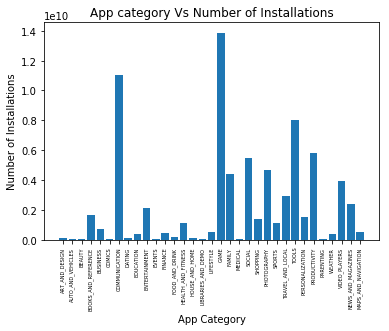

In [10]:
plt.bar(np.arange(len(labels)), labelValues)
plt.xlabel('App Category')
plt.ylabel('Number of Installations')
plt.xticks(np.arange(len(labels)), labels, fontsize=5, rotation=90)
plt.title('App category Vs Number of Installations')
plt.show()

In [11]:
ratingValues = []
for eachLabel in labels:
    ratingValues.append(data.loc[data['Category'] == eachLabel,'Rating'].sum())
print(ratingValues)

[262.6, 305.90000000000003, 179.7, 734.3, 1077.9, 225.8, 1055.1, 532.0, 515.0, 421.8, 199.60000000000002, 1242.9, 392.20000000000005, 1035.3, 257.3, 263.3, 1232.1, 3873.6, 6716.9, 1208.3000000000002, 862.1999999999999, 761.4000000000001, 1093.4, 1096.2, 761.0, 2896.2, 1282.1, 1259.1999999999998, 215.0, 305.5, 598.5999999999999, 840.8, 476.3]


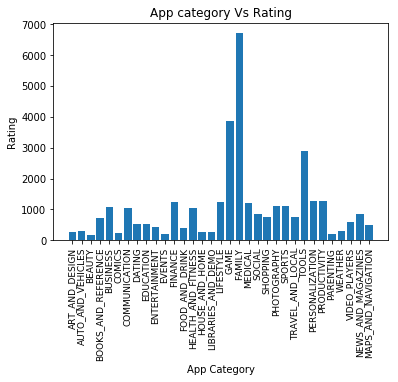

In [12]:
plt.bar(np.arange(len(labels)), ratingValues)
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.xticks(np.arange(len(labels)), labels, fontsize=9, rotation=90)
plt.title('App category Vs Rating')
plt.show()

In [13]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
reviewValues = []
for eachLabel in labels:
    reviewValues.append(data.loc[data['Category'] == eachLabel,'Reviews'].sum())
print(reviewValues)

[1419080, 1163630, 395133, 16720905, 9889779, 2340740, 285810907, 3623311, 13363372, 34762650, 160590, 12661784, 6324707, 21361234, 1929466, 883103, 11831656, 622295937, 143822125, 1182651, 227927470, 44551541, 105351227, 35348212, 26819594, 229351692, 53542336, 55590391, 953609, 12295124, 67484072, 23129264, 17728954]


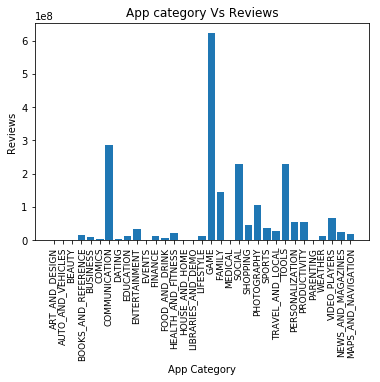

In [14]:
plt.bar(np.arange(len(labels)), reviewValues)
plt.xlabel('App Category')
plt.ylabel('Reviews')
plt.xticks(np.arange(len(labels)), labels, fontsize=9, rotation=90)
plt.title('App category Vs Reviews')
plt.show()

In [15]:
ccLabels = pd.Series(data['Content Rating']).unique()
print(ccLabels)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [16]:
ccValues = []
for each in ccLabels:
    ccValues.append(len(data.groupby(['Content Rating']).groups[each]))
print(ccValues)

[6612, 912, 305, 357, 3, 1]


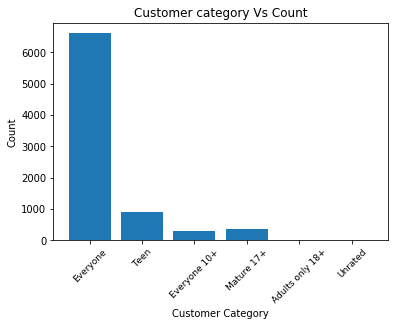

In [17]:
plt.bar(np.arange(len(ccLabels)), ccValues)
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.xticks(np.arange(len(ccLabels)), ccLabels, fontsize=9, rotation=45)
plt.title('Customer category Vs Count')
plt.show()

In [18]:
typeLabels = pd.Series(data['Type']).unique()
print(typeLabels)

['Free' 'Paid']


In [19]:
typeValues = []
for each in typeLabels:
    typeValues.append(len(data.groupby(['Type']).groups[each]))
print(typeValues)

[7588, 602]


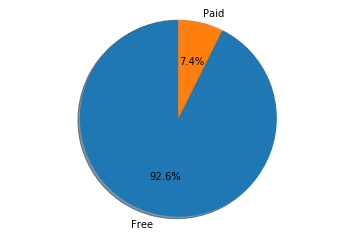

In [20]:
plot1, ax1 = plt.subplots()
ax1.pie(typeValues, labels=typeLabels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [21]:
data.loc[data['Installs'].idxmax()]

App                 Google Play Books
Category          BOOKS_AND_REFERENCE
Rating                            3.9
Reviews                       1433233
Size               Varies with device
Installs                   1000000000
Type                             Free
Price                               0
Content Rating                   Teen
Genres              Books & Reference
Last Updated           August 3, 2018
Current Ver        Varies with device
Android Ver        Varies with device
Name: 152, dtype: object

In [22]:
data.groupby('App').agg({'Installs':'max', 'Rating':'max', 'Size':'min', 'Type':'max' })[['Installs', 'Rating','Size', 'Type' ]].reset_index()

,App,Installs,Rating,Size,Type
0,+Download 4 Instagram Twitter,1000000,4.5,22,Free
1,- Free Comics - Comic Apps,10000,3.5,9.1,Free
2,.R,10000,4.5,203k,Free
3,/u/app,10000,4.7,53,Free
4,058.ba,100,4.4,14,Free
5,1. FC Köln App,100000,4.6,41,Free
6,10 Best Foods for You,500000,4.0,3.8,Free
7,10 Minutes a Day Times Tables,100000,4.1,48,Free
8,10 WPM Amateur ham radio CW Morse code trainer,100,3.5,3.8,Paid
9,"10,000 Quotes DB (Premium)",500,4.1,3.5,Paid
